## Figures for analysis of wild-type MetaCells
This notebook reproduces Figures 2D

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
import pandas as pd
import re
import numpy as np
import glob
from pathlib import Path
from scipy import sparse
from copy import deepcopy
import pickle


<h3> Load data </h3>

In [3]:
out_dir = '/home/chanj3/data/Prostate.LP.publication.010122/out.metacells.individual.010122/Wk0/'

In [4]:
adata = sc.read_h5ad(out_dir + 'adata.metacells.Wk0.010122.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 142 × 15330
    obs: 'metacell_centers', 'metacell_sizes', 'phenograph', 'Basal Correlation', 'Basal vs Luminal by Correlation', 'cell_type'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Basal vs Luminal by Correlation_colors', 'Basal-Luminal_colors', 'cell_type_colors', 'diffmap_evals', 'draw_graph', 'hvg', 'neighbors', 'paga', 'pca', 'phenograph_colors', 'phenograph_sizes', 'umap'
    obsm: 'X_diffmap', 'X_draw_graph_fa', 'X_pca', 'X_umap', 'raw_counts'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

### Figure 3B

In [5]:
sc.set_figure_params(fontsize=20)


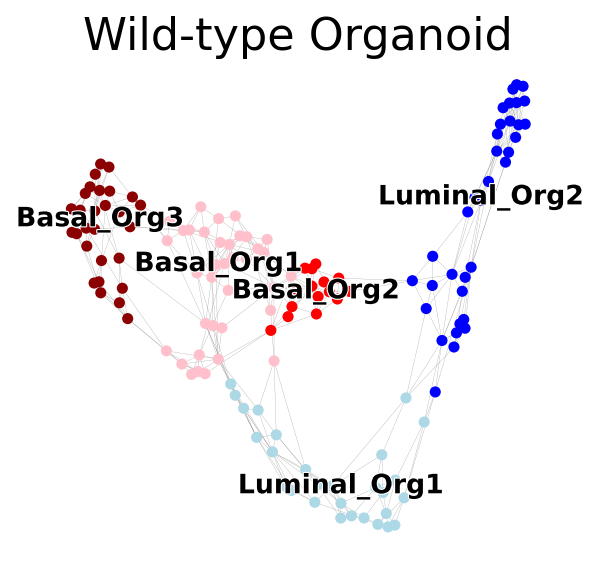

In [6]:
sc.pl.draw_graph(
    adata,
    color=['cell_type'],
    frameon=False, use_raw = False,
    sort_order=False, 
    ncols=2, s=100, edges = True, legend_loc = 'on data', legend_fontsize = 12, title = 'Wild-type Organoid',
    legend_fontoutline = True, 
)

### Figure 3C

In [7]:
ct_dict = {'Basal': ['KRT5','KRT14','TRP63','ITGA6','CALCA'],
           'Basal\nOrg2': ['INHBA','SOX9','THBS1','NDRG1'],
           'Basal\nOrg3': ['STMN1', 'H2AFX','AURKA','MKI67'],
           'Luminal\nOrg1': ['KRT4','KRT6A','KRT10','KRTDAP','DMKN'],
           'Luminal': ['LY6D','TACSTD2','CD24A','KRT8'],
           'Luminal\nOrg2': ['EPCAM','KRT7','KRT18','KRT19','ELF3','PSCA','LY6A'],
}

In [8]:
import itertools
gene_list = list(itertools.chain.from_iterable(list(ct_dict.values())))


In [9]:
ct_pos = [[i for i,j in enumerate(gene_list) if j in val] for val in ct_dict.values()]
ct_pos = [(i[0],i[0]) if len(i)==1 else (i[0],i[-1]) for i in ct_pos]

/home/chanj3/anaconda3/envs/py3.7/lib/python3.7/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  __ = ax.pcolor(_color_df, **kwds)


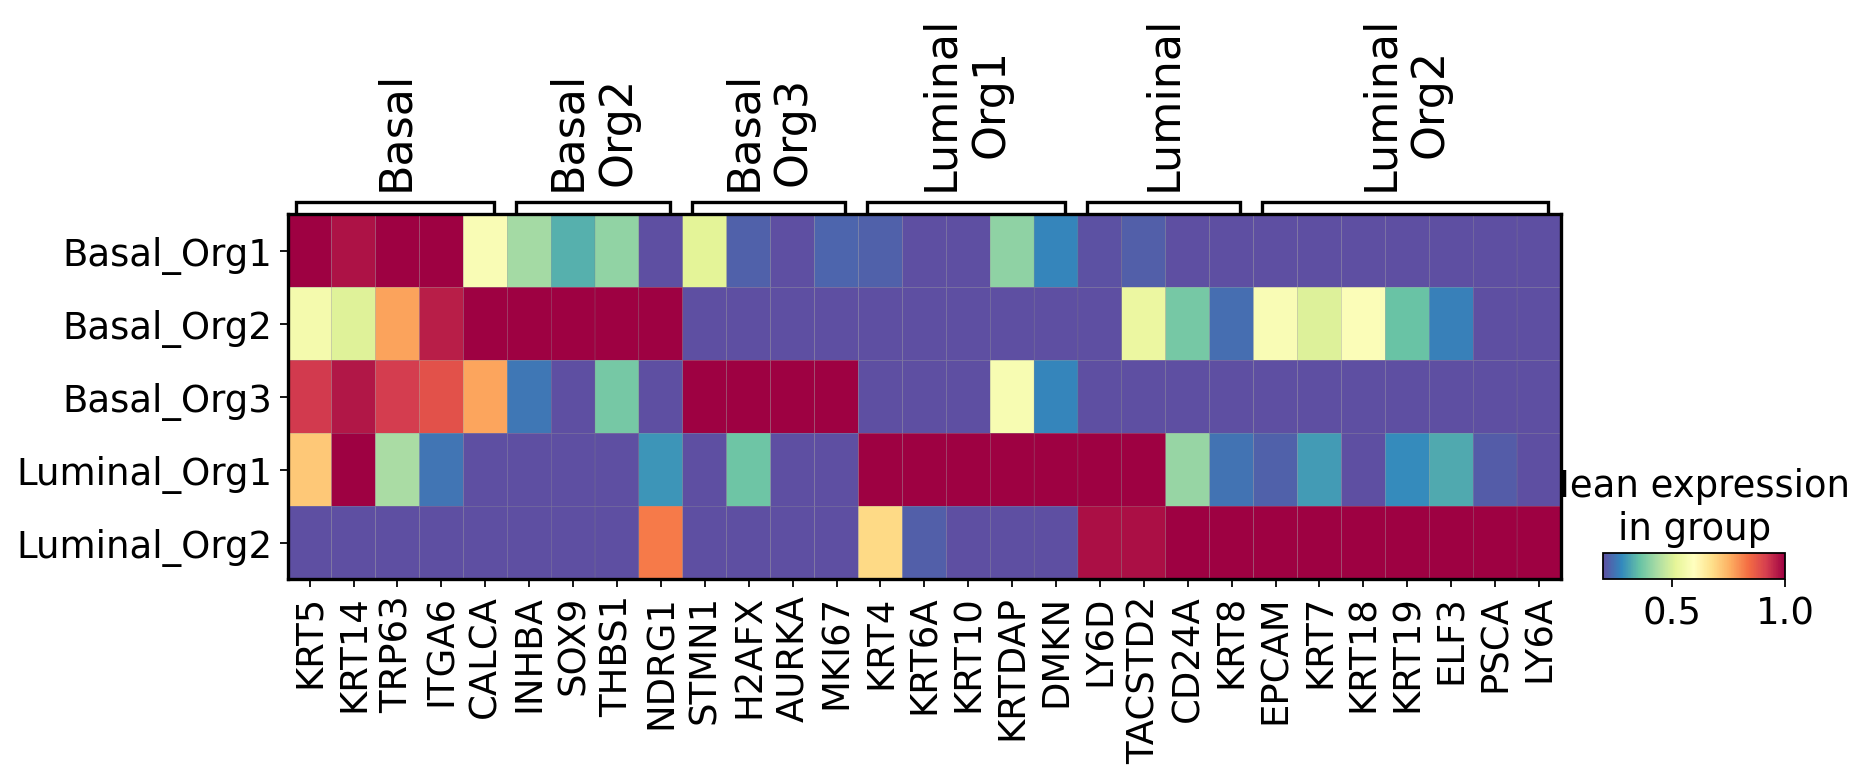

In [10]:
ax = sc.pl.matrixplot(adata, gene_list, groupby='cell_type', dendrogram=False,
                   var_group_positions=ct_pos, use_raw = False, standard_scale = 'var',
                   var_group_labels=list(ct_dict.keys()), cmap = 'Spectral_r', vmin = 0.2, 
                   figsize=(12,3))


### Figure S4B

In [11]:
plot_df = adata.obs.loc[:,['cell_type','Basal Correlation']]
plot_df.cell_type = plot_df.cell_type.astype('category')
plot_df.cell_type = plot_df.cell_type.cat.reorder_categories(sorted(plot_df.cell_type.cat.categories))

In [12]:
fig_dir = out_dir + 'figures/'
os.makedirs(fig_dir, exist_ok = True)

In [13]:
sc.set_figure_params(fontsize=18)
sns.set_style('ticks')

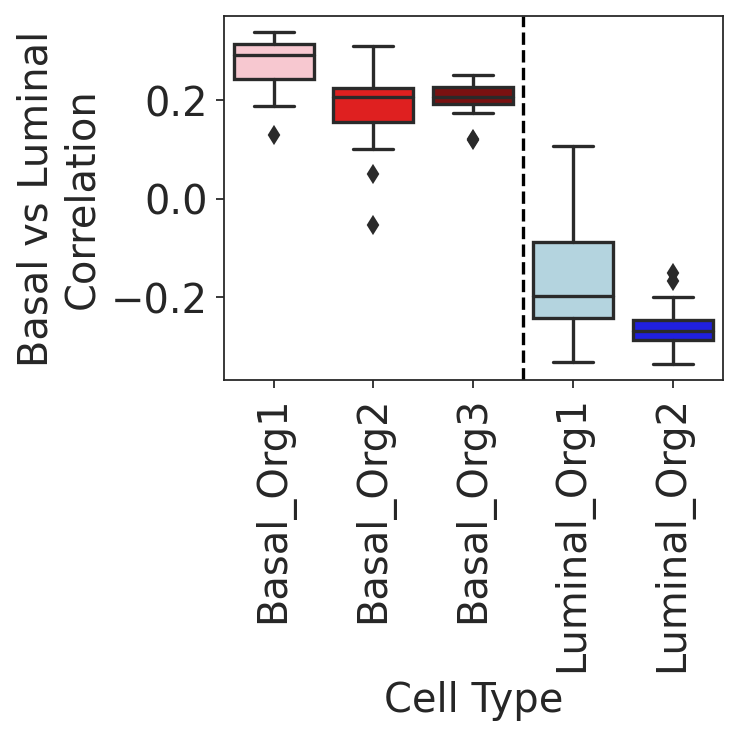

In [14]:
fig, ax = plt.subplots(1,1,figsize=(4,3)) 
sns.boxplot(data=plot_df, x='cell_type', y='Basal Correlation', ax=ax,
           palette= adata.uns['cell_type_colors'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Cell Type')
ax.set_ylabel('Basal vs Luminal\nCorrelation')
ax.axvline(x=2.5, color = 'k', linestyle='--')


In [15]:
from scipy.stats import ttest_1samp

In [16]:
adata.obs

,metacell_centers,metacell_sizes,phenograph,Basal Correlation,Basal vs Luminal by Correlation,cell_type
Cell,,,,,,
0,1386,100,1,-0.250306,CD24,Luminal_Org2
1,1007,10,0,0.313254,CD49f,Basal_Org1
2,539,49,0,0.338324,CD49f,Basal_Org1
3,491,64,2,-0.270177,CD24,Luminal_Org1
4,1047,63,4,0.229268,CD49f,Basal_Org2
...,...,...,...,...,...,...
137,649,3,1,-0.246847,CD24,Luminal_Org2
138,6,39,3,0.215008,CD49f,Basal_Org3
139,753,137,1,-0.334958,CD24,Luminal_Org2


In [17]:
[ttest_1samp(adata.obs.loc[adata.obs.cell_type==i, 'Basal Correlation'], 0).pvalue*5 for i in adata.obs.cell_type.cat.categories]

[3.1647037615720565e-27,
 1.0393657264253726e-05,
 6.759093934638433e-23,
 3.913647383643155e-06,
 1.5209411151081685e-28]